In [4]:
import pandas as pd
import numpy as np
import pickle

In [5]:
f = open('data_list.pickle', 'rb')
data = pickle.load(f)

In [3]:
data = np.array(data)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 72641) + inhomogeneous part.

In [4]:
print(type(data))

<class 'list'>


In [6]:
data.shape

(2, 72630)

In [6]:
sample = data[0]
target = data[1]

In [14]:
j, o = sample[0].shape

ValueError: not enough values to unpack (expected 2, got 1)

In [6]:
print(j[0])

NameError: name 'j' is not defined

In [7]:
max1, max2 = 0, 0
for i in range(72641):
    j = sample[i].shape
    k = target[i].shape
    if j[0] > max1:
        max1 = j[0]
    if k[0] > max2:
        max2 = k[0]
print(max1, max2)
    
    
    

4980 30


In [7]:
sample_array = [np.pad(x, (0, 4980 - len(x)), 'constant') for x in sample]
target_array = [np.pad(x, (0, 30 - len(x)), 'constant') for x in target]

In [22]:
if np.isnan(sample_array).any():
    print('a')
print(np.isnan(sample_array).any())

a
True


In [8]:
sample_array = np.array(sample_array)
target_array = np.array(target_array)
sample_array[np.isnan(sample_array)] = 0
target_array[np.isnan(target_array)] = 0

In [9]:
sample = None
target = None
data = None

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [69]:
def build_and_compile_model(norm):
    drop=0.5
    model = keras.Sequential([
    layers.Dense(4980, activation='linear'),
    layers.BatchNormalization(),
    #layers.Dense(2800, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(drop),
    #layers.Dense(2200, activation='relu'),
    #layers.Dropout(drop),
    #layers.Dense(1500, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(drop),
    layers.Dense(2000, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(drop),
    layers.Dense(1000, activation='relu'),
    layers.BatchNormalization(),
    #layers.Dropout(drop),
    layers.Dense(500, activation='relu'),
    layers.BatchNormalization(),
    #layers.Dropout(drop),
    layers.Dense(200, activation='relu'),
    layers.BatchNormalization(),
    #layers.Dropout(drop),
    layers.Dense(30, activation='linear')
  ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))
    return model

In [13]:
print(len(sample_array), len(target_array))

72641 72641


In [10]:
train_features = sample_array[:58100]
test_features = sample_array[58100:]
train_labels = target_array[:58100]
test_lables = target_array[58100:]

In [71]:
model1 = build_and_compile_model(1)

In [11]:
x = np.array(train_features)
y = np.array(train_labels)

In [72]:
model1.fit(x, y, epochs=25, batch_size=50)

Epoch 1/25
1162/1162 [==============================] - 12s 9ms/step - loss: 12.7387
Epoch 2/25
1162/1162 [==============================] - 11s 9ms/step - loss: 7.7102
Epoch 3/25
1162/1162 [==============================] - 11s 9ms/step - loss: 4.7794
Epoch 4/25
1162/1162 [==============================] - 11s 9ms/step - loss: 4.1930
Epoch 5/25
1162/1162 [==============================] - 11s 9ms/step - loss: 4.0656
Epoch 6/25
1162/1162 [==============================] - 11s 9ms/step - loss: 3.9962
Epoch 7/25
1162/1162 [==============================] - 11s 9ms/step - loss: 3.9410
Epoch 8/25
1162/1162 [==============================] - 11s 9ms/step - loss: 3.8974
Epoch 9/25
1162/1162 [==============================] - 11s 9ms/step - loss: 3.8569
Epoch 10/25
1162/1162 [==============================] - 11s 9ms/step - loss: 3.8170
Epoch 11/25
1162/1162 [==============================] - 11s 9ms/step - loss: 3.7832
Epoch 12/25
1162/1162 [==============================] - 11s 9ms/step - l

In [87]:
model1.save('models\\mae3.5')

INFO:tensorflow:Assets written to: models\mae3.5\assets


In [19]:
y_test = np.array(test_features)

In [73]:
gg = model1.predict(y_test)

In [23]:
eql = np.arange(0, 50)

In [21]:
ind = 100
ind2 = ind + 10

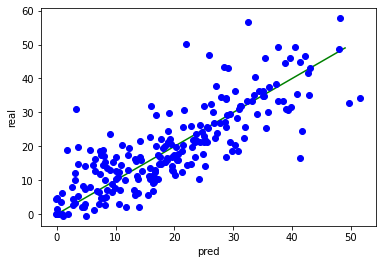

In [27]:
import matplotlib.pyplot as plt
plt.plot(eql, eql, 'g-')
plt.xlabel('pred')
plt.ylabel('real')
for i in range(ind, ind2):
    plt.plot(gg[i], test_lables[i], 'bo')
plt.show()
ind +=100
ind2 += 100

In [117]:
np.mean(np.abs(np.mean(np.abs(gg - test_lables))))

4.5959904461576855

In [65]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(train_features[1].shape)

(3480,)


In [66]:
print(test_lables[0])

[44.25 31.5  23.   23.5  28.25 26.5  25.75 11.5   6.75 10.75 41.75 44.75
 49.5  42.75 25.75 26.25 13.   26.75  5.25  6.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.  ]


In [54]:
sample_array = None
target_array = None

In [56]:
train_features = None
train_labels = None

In [57]:
test_features = None

In [58]:
train_features = None

In [3]:
model2 = keras.models.load_model('models\\mae3.5')

In [18]:
model2.fit(x, y, epochs=25, batch_size=50)

Epoch 1/25
1162/1162 [==============================] - 11s 10ms/step - loss: 2.5193
Epoch 2/25
1162/1162 [==============================] - 11s 10ms/step - loss: 2.5211
Epoch 3/25
1162/1162 [==============================] - 11s 9ms/step - loss: 2.5155
Epoch 4/25
1162/1162 [==============================] - 11s 9ms/step - loss: 2.5162
Epoch 5/25
1162/1162 [==============================] - 11s 9ms/step - loss: 2.5125
Epoch 6/25
1162/1162 [==============================] - 11s 9ms/step - loss: 2.5136
Epoch 7/25
1162/1162 [==============================] - 11s 9ms/step - loss: 2.5135
Epoch 8/25
1162/1162 [==============================] - 11s 9ms/step - loss: 2.5089
Epoch 9/25
1162/1162 [==============================] - 11s 9ms/step - loss: 2.5045
Epoch 10/25
1162/1162 [==============================] - 11s 9ms/step - loss: 2.5026
Epoch 11/25
1162/1162 [==============================] - 11s 9ms/step - loss: 2.5128
Epoch 12/25
1162/1162 [==============================] - 11s 9ms/step - 

In [19]:
model2.save('models\\mae2.5')

INFO:tensorflow:Assets written to: models\mae2.5\assets


In [20]:
y_test = np.array(test_features)
gg = model2.predict(y_test)

In [32]:
test_lables

array([[44.25, 31.5 , 23.  , ...,  0.  ,  0.  ,  0.  ],
       [46.5 , 41.5 , 26.25, ...,  0.  ,  0.  ,  0.  ],
       [36.  , 24.  , 34.75, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [60.  , 39.  , 35.75, ...,  0.  ,  0.  ,  0.  ],
       [43.75, 36.5 , 28.75, ...,  0.  ,  0.  ,  0.  ],
       [44.5 , 47.25, 28.5 , ...,  0.  ,  0.  ,  0.  ]])

In [33]:
x = [1,2,3]
t = np.pad(x, (0, 5 - len(x)), 'constant')

In [35]:
type(t)

numpy.ndarray